<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Intensity and Geometric Transformations

Předzpracování

Nejvíce informace je vždy pbsaženo v původním obraze!

-Cíl - potlačení zkreslení
      - zvýraznění rysů obrazů, které jsou pro nás důležité (využití apriorní informace)
      
Dělení metod podle velikosti okolí bodu

-Bodové jasové transformace

-Geometrické transformace

-Lokální operace (filtrace, průměrování, ostření)

-Frekvenční analýza

In [2]:
import scipy
import scipy.misc
import numpy as np
import urllib
import skimage
import skimage.color
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
#import cStringIO

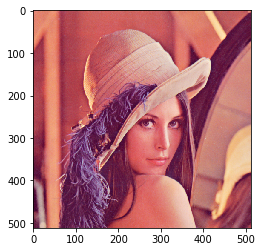

In [5]:
filename = 'Lenna.png'
img = skimage.io.imread(filename)
plt.imshow(img)
plt.show()

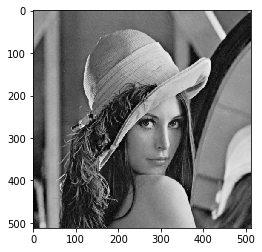

In [6]:
imggray = skimage.color.rgb2gray(img)*255
plt.imshow(imggray, cmap='gray')
plt.show()

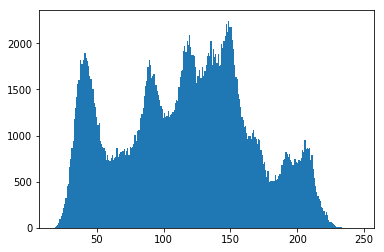

In [31]:
#histogram, a = count, b = values, c = bins
_,b,c = plt.hist(imggray.ravel(), 256)
plt.show()

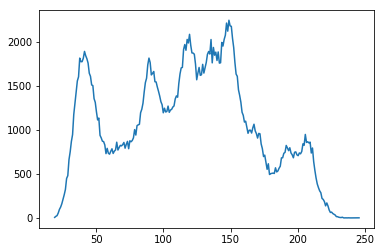

In [5]:
#histogram - skimage
hist_ski, bins = skimage.exposure.histogram(imggray.ravel(), 256)
plt.plot(bins, hist_ski)
plt.show()

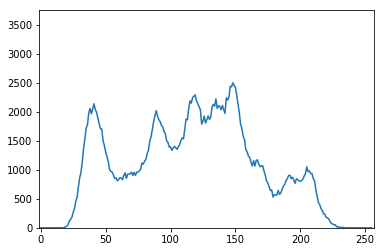

In [6]:
#histogram
hist = np.zeros((256, 1))
for i in range(imggray.shape[0]):
    for j in range(imggray.shape[1]):
        hist[int(imggray[i, j])] = hist[int(imggray[i, j])] + 1 
x = np.arange(256)
plt.axis([-1, 257, 0, np.max(hist) * 1.5])
plt.plot(x, hist)
plt.show()

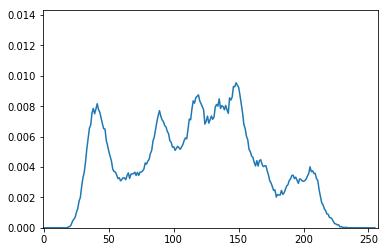

In [7]:
#relativni histogram
norm = np.sum(hist)
relhist = hist / norm
plt.axis([-1, 257, 0, np.max(relhist) * 1.5])
plt.plot(x, relhist)
plt.show()

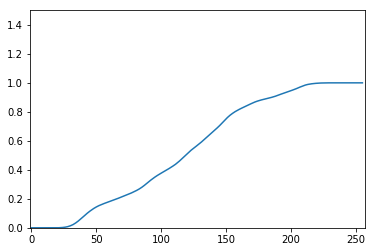

In [8]:
#kumulativni histogram
cumhist = np.zeros(relhist.shape)
cumhist[0] = relhist[0]
for i in range(relhist.shape[0]-1):
    cumhist[i + 1] = cumhist[i] + relhist[i + 1]
plt.axis([-1, 257, 0, np.max(cumhist) * 1.5])
plt.plot(x, cumhist)
plt.show()

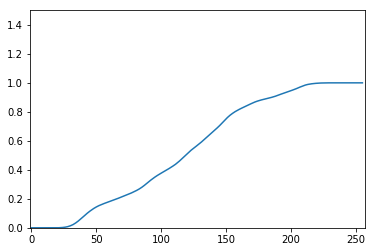

In [9]:
#kumulativni hist - ukazka funkce cumsum
cumhist2 = np.cumsum(relhist)
plt.axis([-1, 257, 0, np.max(cumhist2) * 1.5])
plt.plot(x, cumhist2)
plt.show()

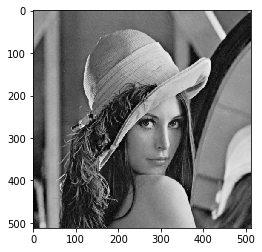

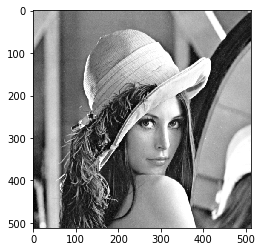

In [10]:
#zmen jas
value = 50
imggray2 = np.empty(imggray.shape, dtype=np.uint8)
for i in range(imggray.shape[0]):
    for j in range(imggray.shape[1]):
        pom = 1.0 * float(imggray[i,j]) + value   
        if pom > 255:
            pom = 255
        if pom < 0:
            pom = 0
        imggray2[i,j] = pom
plt.figure()
plt.imshow(imggray, cmap='gray')
plt.figure()
plt.imshow(imggray2, cmap='gray')
plt.show()

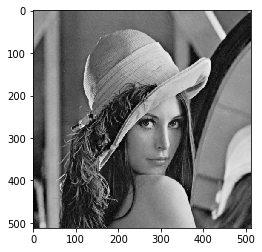

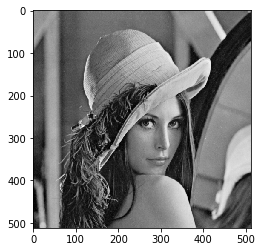

In [11]:
#zmen konstrast
value = 0.5
korekce = 40
imggray3 = np.empty(imggray.shape, dtype=np.uint8)
for i in range(imggray.shape[0]):
    for j in range(imggray.shape[1]):
        pom = value * float(imggray[i,j]) + korekce    
        if pom > 255:
            pom = 255
        if pom < 0:
            pom = 0
        imggray3[i,j] = pom
plt.figure()
plt.imshow(imggray, cmap='gray')
plt.figure()
plt.imshow(imggray3, cmap='gray')
plt.show()

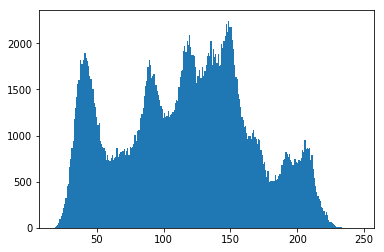

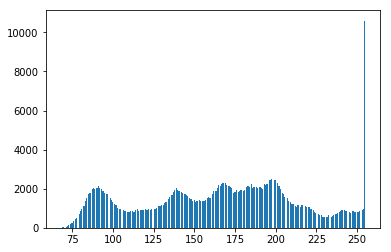

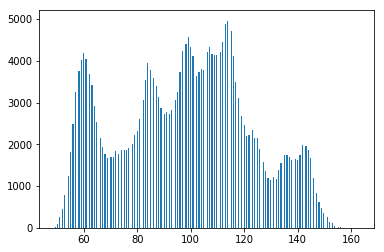

In [12]:
#histogramy
plt.figure()
a,b,c = plt.hist(imggray.ravel(), 256)
plt.figure()
a,b,c = plt.hist(imggray2.ravel(), 256)
plt.figure()
a,b,c = plt.hist(imggray3.ravel(), 256)
plt.show()

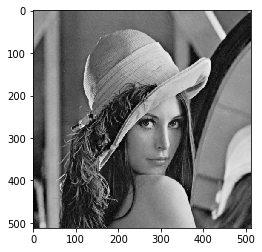

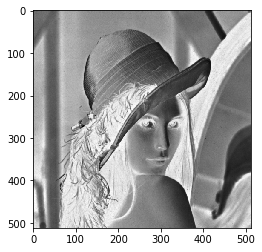

In [13]:
#negativ
imggrayN = np.zeros_like(imggray)
for i in range(imggray.shape[0]):
    for j in range(imggray.shape[1]):  
        imggrayN[i, j] = 255 - imggray[i, j]
plt.figure()
plt.imshow(imggray, cmap='gray')
plt.figure()
plt.imshow(imggrayN, cmap='gray')
plt.show()

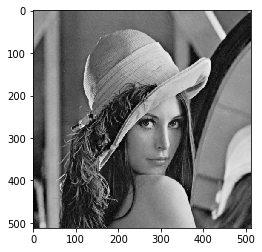

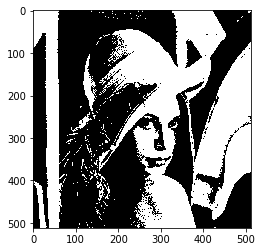

In [14]:
#primitivni prahovani
imgthres = imggray > 128
plt.figure()
plt.imshow(imggray, cmap='gray')
plt.figure()
plt.imshow(imgthres, cmap='gray')
plt.show()

In [7]:
def naprahuj(image, threshold):
    threshold.insert(0, 0)
    im2 = np.empty(image.shape, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]): 
            for k in range(len(threshold)):
                if threshold[len(threshold)- k - 1] <= image[i, j]:                  
                    im2[i, j] = np.uint8(np.round(np.double((len(threshold) - k - 1))))
                    break
    return im2

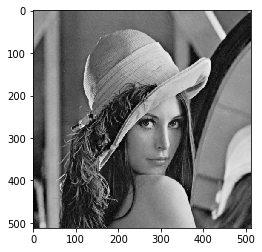

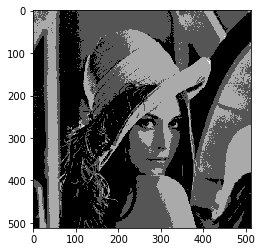

In [8]:
imgtr2 = naprahuj(imggray, [100,150,230])
plt.figure()
plt.imshow(imggray, cmap='gray')
plt.figure()
plt.imshow(imgtr2, cmap='gray')
plt.show()

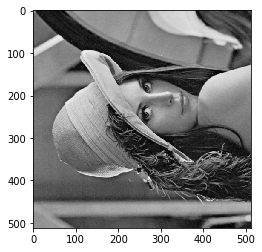

In [17]:
#rotace
imgr = skimage.transform.rotate(imggray, 90)
plt.imshow(imgr, cmap='gray')
plt.show()

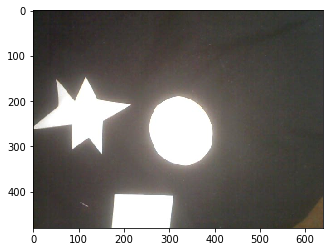

In [11]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
# URL = "http://plzen.cz/kamera.php?0.8989779513794929"
# URL = "http://www.chmi.cz/files/portal/docs/meteo/kam/pribram.jpg"

im = skimage.io.imread(URL)
# im = skimage.io.imread(URL, as_grey=True)
plt.imshow(im)
plt.show()

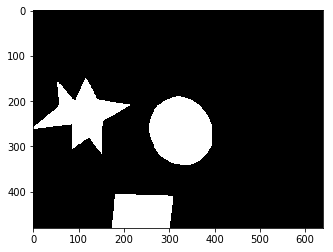

In [12]:
#Prahovani
imgray = skimage.color.rgb2gray(im)
imthr = imgray>0.8
plt.imshow(imthr, cmap='gray')
plt.show()

In [13]:
#Pocitani objektu v obraze
import skimage.measure
imlabel = skimage.measure.label(imthr)
print(np.max(imlabel))
print(imlabel.shape)

3
(480, 640)


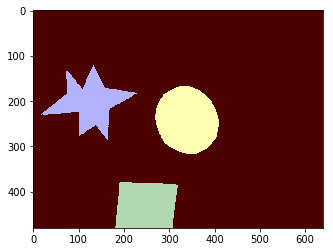

In [8]:
#Obarveni objektu
from skimage.color import label2rgb
image_label_overlay = label2rgb(imlabel, image=imthr)
plt.imshow(image_label_overlay)
plt.show()